**SYRIA CUSTOMER CHURN**

EDWIN RURUNG'A MUHIA

**BUSINESS OVERVIEW**


SyriaTel is a telecommunications company in Syria. They have been informed that some of their customers have started to churn, discontinue their service. 

This analysis will determine what features will indicate if a customer will ("soon") discontinue their service.

 **Data Preparation**

1. Importing libraries

In [67]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#libraries for statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#libraries for evaluation
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import (recall_score,
                            precision_score,
                            f1_score,
                            classification_report,
                            roc_auc_score)

from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE #SMOTE technique to deal with unbalanced data problem
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
from scipy import stats

#===== Statistic Testing =====#
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

#=====Feature Selection =====#
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings('ignore')



2. **Importing Data**


In [68]:
df=pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


*

3. **Data Understanding**

In [69]:
#creating a function for checking information on our data
# checking data info
def info_data(data):
    missing_values= data.isnull().sum()
    missing_perce= (missing_values/len(data)*100)
    data_type = data.dtypes
    num_unique = data.nunique()
    print (f'Number of Rows,Columns {data.shape}')
    print (f'Number of Duplicated Values {data.duplicated().sum()}')


    return pd.DataFrame ({'Missing_value' : missing_values,
                          'Percent_missing_%' : missing_perce,
                          'Data_type' : data_type,
                          'Number of Unique' : num_unique}).sort_values('Percent_missing_%',ascending=False)



**Checking for outliers**

In [70]:
#creating a function for checking outliers in our data
def outlier(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iql=q3-q1
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)
    outlier_list=df[column].apply(lambda x:'outlier' if x<lower or x>upper else 'not-outlier')
    print (f' outlier lower limit : {lower} \n outlier upper limit : {upper}')
    return outlier_list

**Data Inspection**

In [71]:
#checking the top 5 rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [72]:
#checking information on our data
info_data(df)

Number of Rows,Columns (3333, 21)
Number of Duplicated Values 0


,Missing_value,Percent_missing_%,Data_type,Number of Unique
state,0,0.0,object,51
total eve calls,0,0.0,int64,123
customer service calls,0,0.0,int64,10
total intl charge,0,0.0,float64,162
total intl calls,0,0.0,int64,21
total intl minutes,0,0.0,float64,162
total night charge,0,0.0,float64,933
total night calls,0,0.0,int64,120
total night minutes,0,0.0,float64,1591
total eve charge,0,0.0,float64,1440


In [73]:
#checking for unique values
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [74]:
#printinf a list of the unique values
for x in df.columns : 
    print (f'===== {x} =====')
    print (f'{df[x].unique()}')
    print()

===== state =====
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

===== account length =====
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27 

**Explanatory Data Analysis**

In [75]:
#copying our dataframe to a new dataframe
df_new=df.copy()

### Feature Types
* Continuous features are numeric values with an infinite number of possible values
* Categorical features are values that have a finite number of categories/groups
* This step seperates all of the useful features in the dataset so that they can be analyzed accordingly ahead of modeling.  

#### Continuous Features:
* account length
* number vmail messages
* total day minutes
* total day calls
* total day charge
* total eve minutes
* total eve calls
* total eve charge
* total night minutes 
* total night calls
* total night charge
* total intl minutes
* total intl charge
* customer service calls

#### Categorical Features:
* state
* area code
* international plan
* voicemail plan

In [76]:
# Create numeric & categorical lists
numeric_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categoric_cols = ['state','area code','international plan','voice mail plan']

**Identifying Dependent Variable**

* The churn column will be used as our dependent variable
* Churn indicates if a customer has terminated their contract with SyriaTel. True indicates they have terminated and false indicates they have not and have and have an account. 

False    2850
True      483
Name: churn, dtype: int64


<AxesSubplot:xlabel='churn', ylabel='count'>

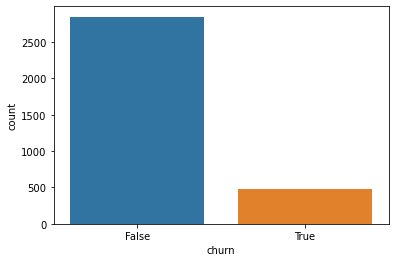

In [77]:
#checking values in the churn column
print(df_new['churn'].value_counts())
sns.countplot(data=df, x='churn')

Of the 3,333 customers in the dataset, 483 have terminated their contract with SyriaTel. That is 14.5% of customers lost.

415    1655
510     840
408     838
Name: area code, dtype: int64


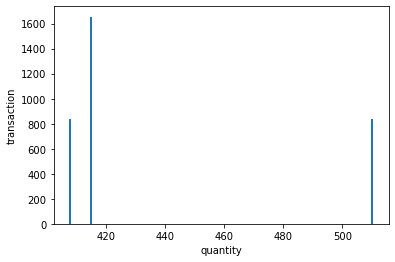

In [78]:
#Analyzing Area Code
print(df["area code"].value_counts())
area = df['area code'].value_counts()
transaction = area.index
quantity = area.values
#plotting bar graph
plt.bar(transaction,quantity)
plt.title="Distribution of area Code"
plt.xlabel("quantity")
plt.ylabel("transaction")
plt.show()


Half of the customers have the area code 415. One fourth of customers have the area code 510 and another fourth have the area code 408.

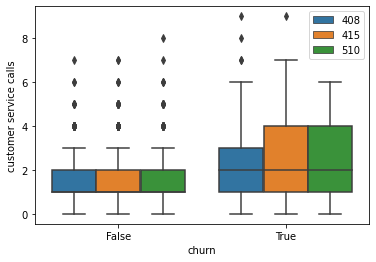

In [79]:
# Boxplot to see areas in relation to the churn column
sns.boxplot(data=df,x="churn",y="customer service calls",hue="area code")
plt.legend(loc='upper right')


**Checking the Distribution Curve of Numeric features**


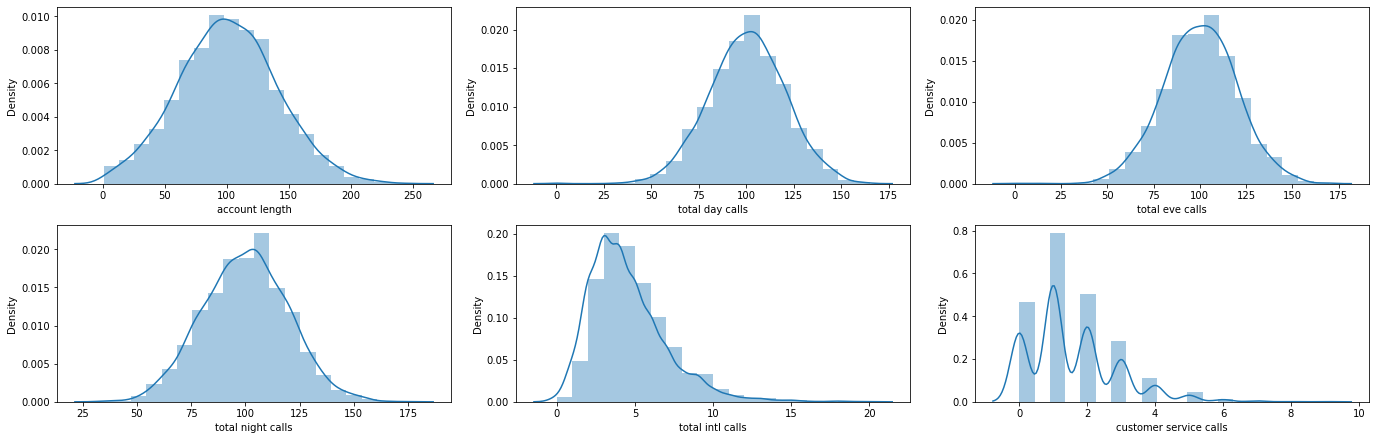

In [80]:
#plotting distribution curves
f,ax=plt.subplots (2,3,figsize=(19,6),constrained_layout = True)
sns.distplot(df["account length"],bins=20,ax=ax[0,0]);

sns.distplot(df["total day calls"],bins=20,ax=ax[0,1]);

sns.distplot(df["total eve calls"],bins=20,ax=ax[0,2]);

sns.distplot(df["total night calls"],bins=20,ax=ax[1,0]);

sns.distplot(df["total intl calls"],bins=20,ax=ax[1,1]);

sns.distplot(df["customer service calls"],bins=20,ax=ax[1,2]);

All features seem to have a normal distribution apart from customer servoce calls, whereeas totoal international call seeto be skewed to the right but still has  normal distribution.

**Correlation map between the Numeric features**

<AxesSubplot:>

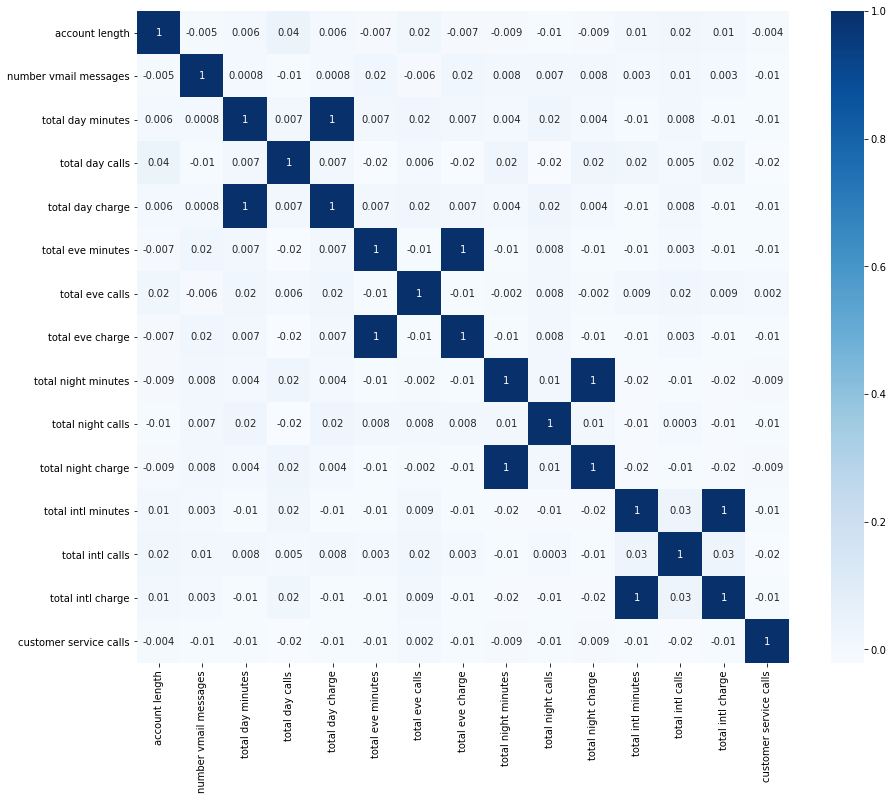

In [81]:
#Correlation matrix figure
corr_mat= df[numeric_cols].corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g')


**Detecting outliers**

In [82]:
#removing outliers from our dataframe
print("Before dropping numerical outliers, length of the dataframe is: ",len(df))
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(df)
print("After dropping numerical outliers, length of the dataframe is: ",len(df))

Before dropping numerical outliers, length of the dataframe is:  3333
After dropping numerical outliers, length of the dataframe is:  3169


In [83]:
#dropping highly correlated feutures to reduce multicorrelinarity
print("The original dataframe has {} columns.".format(df.shape[1]))
# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

reduced_df = df.drop(to_drop, axis=1) # Drop the features
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The original dataframe has 21 columns.
The reduced dataframe has 17 columns.


### Transforming "Churn" Feature's Rows into 0s and 1s

In [84]:
#checking for number of values
reduced_df['churn'].value_counts()
#convertting churn columns to 0 and 1
reduced_df['churn'] = reduced_df['churn'].map({True: 1, False: 0}).astype('int') 
#checking our data frame
reduced_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


## One Hot Encoding

Changing the categorical values to numeric values to be used in modelling

In [85]:
dummy_df_state = pd.get_dummies(reduced_df["state"],dtype=np.int64,prefix="state_is")
dummy_df_area_code = pd.get_dummies(reduced_df["area code"],dtype=np.int64,prefix="area_code_is")
dummy_df_international_plan = pd.get_dummies(reduced_df["international plan"],dtype=np.int64,prefix="international_plan_is",drop_first = True)
dummy_df_voice_mail_plan = pd.get_dummies(reduced_df["voice mail plan"],dtype=np.int64,prefix="voice_mail_plan_is",drop_first = True)


reduced_df = pd.concat([reduced_df,dummy_df_state,dummy_df_area_code,dummy_df_international_plan,dummy_df_voice_mail_plan],axis=1)
reduced_df = reduced_df.loc[:,~reduced_df.columns.duplicated()]
reduced_df = reduced_df.drop(['state','area code','international plan','voice mail plan'],axis=1)

reduced_df.head()

,account length,phone number,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,...,state_is_VT,state_is_WA,state_is_WI,state_is_WV,state_is_WY,area_code_is_408,area_code_is_415,area_code_is_510,international_plan_is_yes,voice_mail_plan_is_yes
0,128,382-4657,25,110,45.07,99,16.78,91,11.01,3,...,0,0,0,0,0,0,1,0,0,1
1,107,371-7191,26,123,27.47,103,16.62,103,11.45,3,...,0,0,0,0,0,0,1,0,0,1
2,137,358-1921,0,114,41.38,110,10.30,104,7.32,5,...,0,0,0,0,0,0,1,0,0,0
3,84,375-9999,0,71,50.90,88,5.26,89,8.86,7,...,0,0,0,0,0,1,0,0,1,0
4,75,330-6626,0,113,28.34,122,12.61,121,8.41,3,...,0,0,0,0,0,0,1,0,1,0


**Scaling numerical Values**

In [86]:
#using MinMaxScaler to transform our data
transformer = MinMaxScaler()
#creating a function for scaling 
def scaling(columns):
    return transformer.fit_transform(reduced_df[columns].values.reshape(-1,1))

for i in reduced_df.select_dtypes(include=[np.number]).columns:
    reduced_df[i] = scaling(i)
reduced_df.head()

,account length,phone number,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,...,state_is_VT,state_is_WA,state_is_WI,state_is_WV,state_is_WY,area_code_is_408,area_code_is_415,area_code_is_510,international_plan_is_yes,voice_mail_plan_is_yes
0,0.587963,382-4657,0.510204,0.576271,0.773956,0.487179,0.490082,0.422414,0.643644,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.490741,371-7191,0.530612,0.686441,0.450248,0.521368,0.483858,0.525862,0.675974,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.629630,358-1921,0.000000,0.610169,0.706088,0.581197,0.238040,0.534483,0.372520,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.384259,375-9999,0.000000,0.245763,0.881184,0.393162,0.042007,0.405172,0.485672,0.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.342593,330-6626,0.000000,0.601695,0.466250,0.683761,0.327888,0.681034,0.452608,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


**Performing a Train Test Split**

In [117]:
X=reduced_df.drop(['churn'],axis=1)
y=reduced_df['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)


In [118]:
#insert 'churn' in X_train and X_test for easier analysis
X_train['churn'] = y_train
X_test['churn'] = y_test

### Applying SMOTE Technique to Resolve Unbalanced 'churn' Feature
* Synthetic Minority Oversampling Technique ("SMOTE") is an oversampling technique where synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.
* The technique aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [119]:
reduced_df.value_counts()


account length  phone number  number vmail messages  total day calls  total day charge  total eve calls  total eve charge  total night calls  total night charge  total intl calls  total intl charge  customer service calls  churn  state_is_AK  state_is_AL  state_is_AR  state_is_AZ  state_is_CA  state_is_CO  state_is_CT  state_is_DC  state_is_DE  state_is_FL  state_is_GA  state_is_HI  state_is_IA  state_is_ID  state_is_IL  state_is_IN  state_is_KS  state_is_KY  state_is_LA  state_is_MA  state_is_MD  state_is_ME  state_is_MI  state_is_MN  state_is_MO  state_is_MS  state_is_MT  state_is_NC  state_is_ND  state_is_NE  state_is_NH  state_is_NJ  state_is_NM  state_is_NV  state_is_NY  state_is_OH  state_is_OK  state_is_OR  state_is_PA  state_is_RI  state_is_SC  state_is_SD  state_is_TN  state_is_TX  state_is_UT  state_is_VA  state_is_VT  state_is_WA  state_is_WI  state_is_WV  state_is_WY  area_code_is_408  area_code_is_415  area_code_is_510  international_plan_is_yes  voice_mail_plan_is_yes
1.0